# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
# print(cities)

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | boone
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | zouerate
Processing Record 6 of Set 1 | despenaderos
Processing Record 7 of Set 1 | ormara
Processing Record 8 of Set 1 | boguchany
Processing Record 9 of Set 1 | gaiman
Processing Record 10 of Set 1 | saipan
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | dudinka
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | lubao
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | yung shue wan
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | mahibadhoo
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | fort william
Processing Record 22 of Set 1 | coc

Processing Record 38 of Set 4 | am djarass
City not found. Skipping...
Processing Record 39 of Set 4 | wailua homesteads
Processing Record 40 of Set 4 | george town
Processing Record 41 of Set 4 | happy valley-goose bay
Processing Record 42 of Set 4 | madhogarh
Processing Record 43 of Set 4 | kruisfontein
Processing Record 44 of Set 4 | juneau
Processing Record 45 of Set 4 | coahuayana de hidalgo
Processing Record 46 of Set 4 | vallenar
Processing Record 47 of Set 4 | aleppo
Processing Record 48 of Set 4 | port moresby
Processing Record 49 of Set 4 | kenora
Processing Record 0 of Set 5 | punta arenas
Processing Record 1 of Set 5 | turinsk
Processing Record 2 of Set 5 | latina
Processing Record 3 of Set 5 | keflavik
Processing Record 4 of Set 5 | codrington
Processing Record 5 of Set 5 | ad dilam
Processing Record 6 of Set 5 | kincardine
Processing Record 7 of Set 5 | puerto madero
Processing Record 8 of Set 5 | west hattiesburg
Processing Record 9 of Set 5 | west island
Processing Reco

Processing Record 29 of Set 8 | slave lake
Processing Record 30 of Set 8 | novopavlovsk
Processing Record 31 of Set 8 | forster
Processing Record 32 of Set 8 | sarmiento
Processing Record 33 of Set 8 | impfondo
Processing Record 34 of Set 8 | mahdia
Processing Record 35 of Set 8 | fannuj
City not found. Skipping...
Processing Record 36 of Set 8 | portland
Processing Record 37 of Set 8 | kijang
Processing Record 38 of Set 8 | padang
Processing Record 39 of Set 8 | tobelo
Processing Record 40 of Set 8 | redencao
Processing Record 41 of Set 8 | zhigalovo
Processing Record 42 of Set 8 | maridi
Processing Record 43 of Set 8 | ar ruways
Processing Record 44 of Set 8 | lambton shores
City not found. Skipping...
Processing Record 45 of Set 8 | tataouine
Processing Record 46 of Set 8 | aykhal
Processing Record 47 of Set 8 | sao gabriel da cachoeira
Processing Record 48 of Set 8 | cozumel
Processing Record 49 of Set 8 | grand falls-windsor
Processing Record 0 of Set 9 | barra de santo antonio
Pr

Processing Record 15 of Set 12 | okha
Processing Record 16 of Set 12 | san antonio de pale
Processing Record 17 of Set 12 | bicester
Processing Record 18 of Set 12 | rosario do sul
Processing Record 19 of Set 12 | urucara
Processing Record 20 of Set 12 | willowmore
Processing Record 21 of Set 12 | whitecourt
Processing Record 22 of Set 12 | jamaame
Processing Record 23 of Set 12 | shalqar
Processing Record 24 of Set 12 | gizo
Processing Record 25 of Set 12 | tuy hoa
Processing Record 26 of Set 12 | margate
Processing Record 27 of Set 12 | megion
-----------------------------
Data Retrieval Complete      
-----------------------------


In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country",
                                                  "Date"])

# Show Record Count
city_data_df.count()


City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,289.03,77,2,7.95,ZA,1699903837
1,bethel,41.3712,-73.4140,281.83,53,0,3.09,US,1699903838
2,boone,39.0334,-92.3335,294.59,24,0,3.68,US,1699903839
3,grytviken,-54.2811,-36.5092,275.80,98,100,2.39,GS,1699903840
4,zouerate,22.7187,-12.4521,300.97,16,77,3.63,MR,1699903841


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,289.03,77,2,7.95,ZA,1699903837
1,bethel,41.3712,-73.4140,281.83,53,0,3.09,US,1699903838
2,boone,39.0334,-92.3335,294.59,24,0,3.68,US,1699903839
3,grytviken,-54.2811,-36.5092,275.80,98,100,2.39,GS,1699903840
4,zouerate,22.7187,-12.4521,300.97,16,77,3.63,MR,1699903841


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

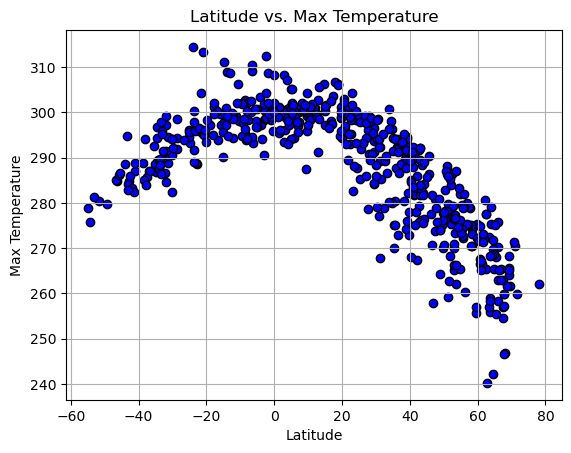

In [28]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.scatter(lat, temp, edgecolors="black", c="blue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Max Temperature")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

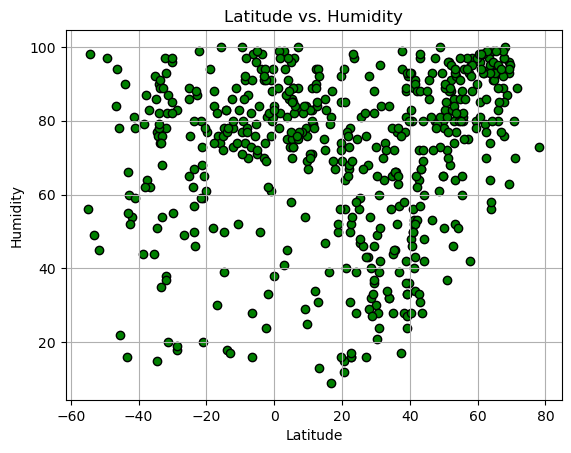

In [29]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(lat, humidity, edgecolors="black", c="green")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.grid(visible=True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

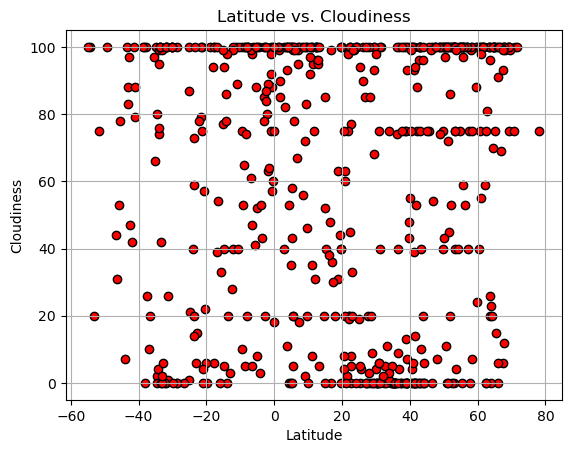

In [30]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloud = city_data_df["Cloudiness"]

plt.scatter(lat, cloud, edgecolors="black", c="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.grid(visible=True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

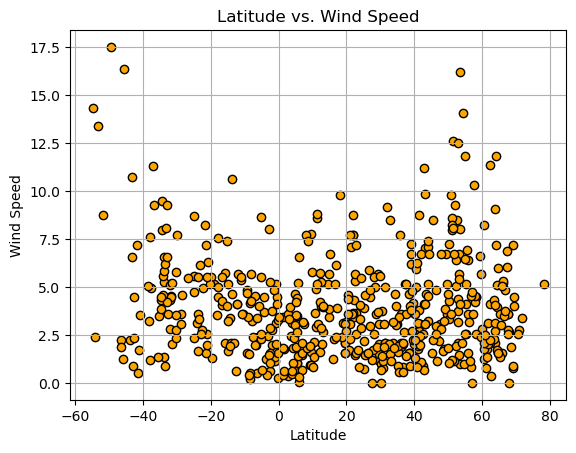

In [31]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]

plt.scatter(lat, wind, edgecolors="black", c="orange")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.grid(visible=True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def weather_linregress(x,y,xlabel, ylabel):
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    lin_reg = x * slope + intercept
    plt.scatter(x, y, edgecolors="black", c="blue")
    plt.plot(x,lin_reg)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs. {ylabel}")
    print(f"The r-value is: {rvalue}")
    if slope<=0:
        plt.annotate(f"y={round(slope,3)}x + {round(intercept,3)}", xy=(0.01,0.01), xycoords='axes fraction', color="red", fontsize=12)
    else:
        plt.annotate(f"y={round(slope,3)}x + {round(intercept,3)}", xy=(0.6,0.01), xycoords='axes fraction', color="red", fontsize=12)
    

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,281.83,53,0,3.09,US,1699903838
2,boone,39.0334,-92.3335,294.59,24,0,3.68,US,1699903839
4,zouerate,22.7187,-12.4521,300.97,16,77,3.63,MR,1699903841
6,ormara,25.2088,64.6357,298.80,47,94,0.71,PK,1699903843
7,boguchany,58.3814,97.4531,274.18,97,100,4.47,RU,1699903844


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,289.03,77,2,7.95,ZA,1699903837
3,grytviken,-54.2811,-36.5092,275.80,98,100,2.39,GS,1699903840
5,despenaderos,-31.8163,-64.2899,299.12,38,0,4.52,AR,1699903842
8,gaiman,-43.2897,-65.4929,294.73,16,100,10.74,AR,1699903847
14,waitangi,-43.9535,-176.5597,288.61,90,7,2.24,NZ,1699903853


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8607383944679036


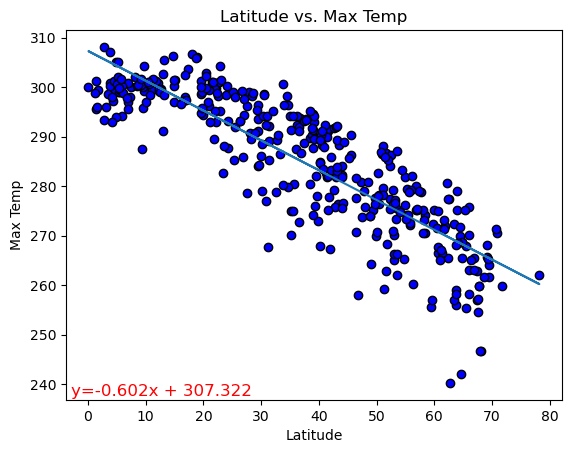

In [35]:
# Linear regression on Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_temp = northern_hemi_df["Max Temp"]
northern_regress = weather_linregress(northern_lat, northern_temp, "Latitude", "Max Temp")

The r-value is: 0.7520426569299882


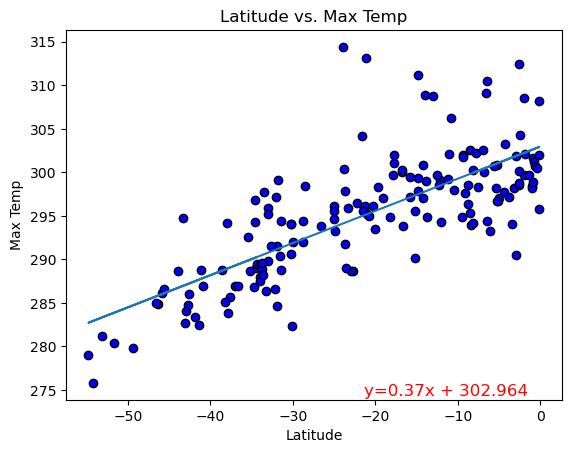

In [36]:
# Linear regression on Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_temp = southern_hemi_df["Max Temp"]
southern_regress = weather_linregress(southern_lat, southern_temp,"Latitude", "Max Temp")


**Discussion about the linear relationship:**
The linear regression of the Northern Hemisphere shows a strong negative correlation. As the latitude increases, the temperature decreases due to the distance from the equator increasing.
The linear regression of the Southern Hemisphere shows a strong positive correlation. As the latitude increases, the temperature increases due to the distance from the equator decreasing.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23390074378552245


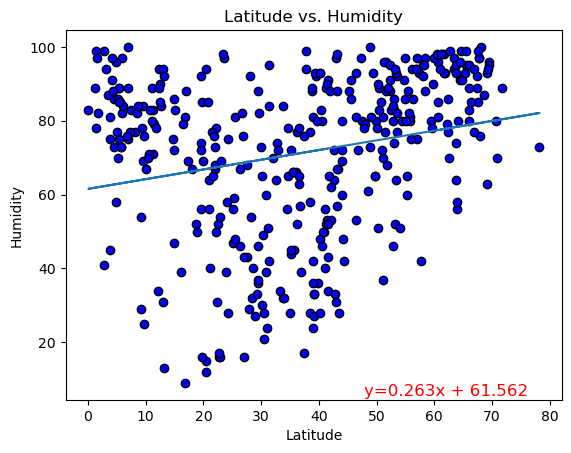

In [37]:
# Northern Hemisphere
weather_linregress(northern_hemi_df["Lat"], northern_hemi_df['Humidity'], "Latitude", "Humidity")


The r-value is: 0.1569501341007986


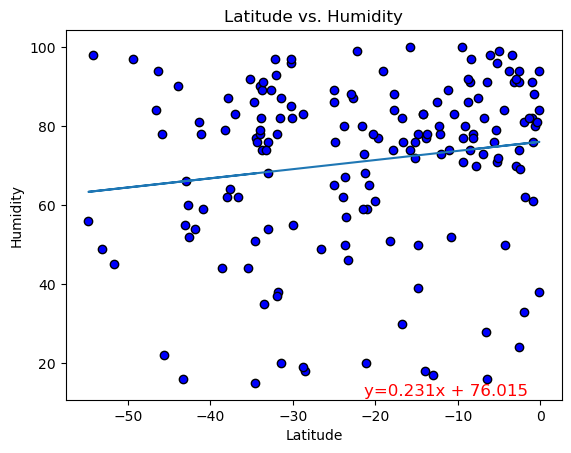

In [38]:
# Southern Hemisphere
weather_linregress(southern_hemi_df["Lat"], southern_hemi_df['Humidity'], "Latitude", "Humidity")

**Discussion about the linear relationship:**
The linear regression of the Northern Hemisphere shows a very weak positive to no correlation. 
The linear regression of the Southern Hemisphere shows a very weak positive to no correlation.
Altitude and biome could cause more change than latitude alone.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11320919295538617


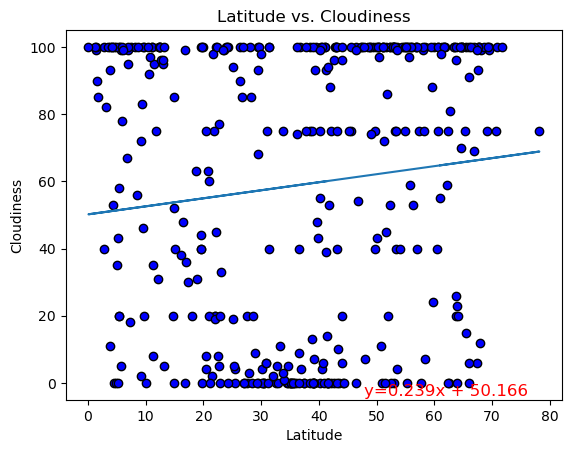

In [39]:
# Northern Hemisphere
weather_linregress(northern_hemi_df["Lat"], northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness")

The r-value is: 0.08286419454788281


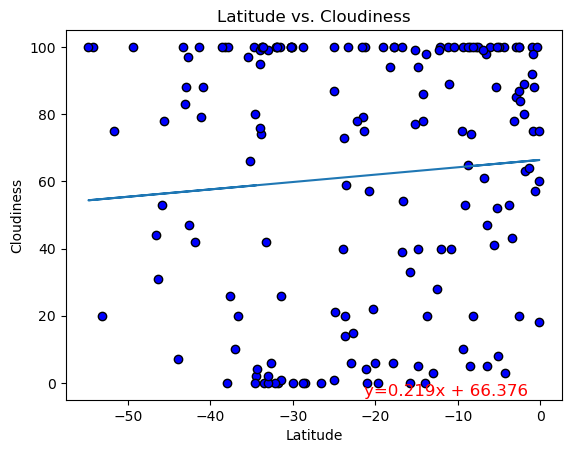

In [40]:
# Southern Hemisphere
weather_linregress(southern_hemi_df["Lat"], southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** 
The linear regression of the Northern Hemisphere shows a very weak positive to no correlation. 
The linear regression of the Southern Hemisphere shows a very weak positive to no correlation.
Altitude and topography may have more influence over cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.16317967552855345


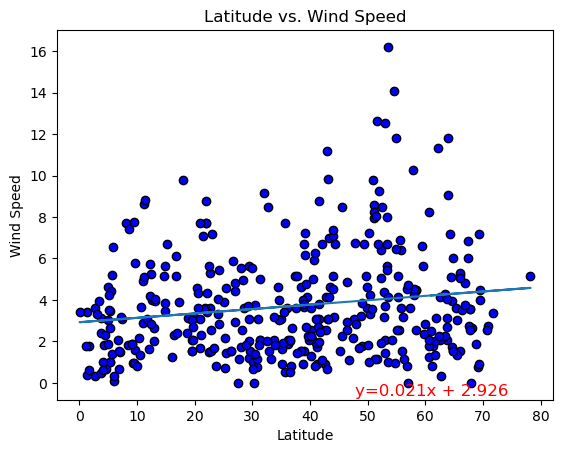

In [41]:
# Northern Hemisphere
weather_linregress(northern_hemi_df["Lat"], northern_hemi_df['Wind Speed'], "Latitude", "Wind Speed")

The r-value is: -0.3902892391198649


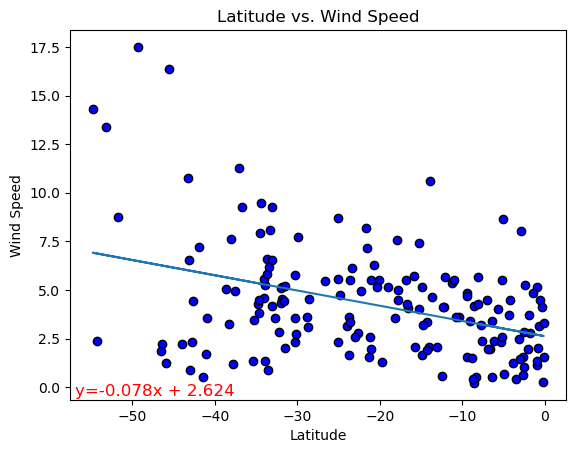

In [42]:
# Southern Hemisphere
weather_linregress(southern_hemi_df["Lat"], southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** 
The linear regression of the Northern Hemisphere shows a very weak positive to no correlation. 
The linear regression of the Southern Hemisphere shows a weak negative correlation.